# Experiment: Comparing different momentum parameters for a learning rate $\epsilon = 0.0002$

In [2]:
using Revise, QARBoM, DWave, DataFrames, CSV

    CondaPkg Found dependencies: /Users/pripper/.julia/packages/DWave/i51VN/CondaPkg.toml
    CondaPkg Found dependencies: /Users/pripper/.julia/packages/PythonCall/S5MOg/CondaPkg.toml
    CondaPkg Found dependencies: /Users/pripper/.julia/packages/DWave/S7WH5/CondaPkg.toml
    CondaPkg Dependencies already up to date


In [3]:
MOI = QARBoM.QUBO.ToQUBO.MOI

MathOptInterface

In [4]:
df = DataFrame(CSV.File(raw"./converted_bool_only.csv"))

x_train = Vector{Vector{Int}}()

for row in eachrow(df)
    push!(x_train, collect(row))
end

In [5]:
learning_rate = 0.0002

0.0002

In [12]:
num_sweeps = 75
num_reads = 25
momentums = [i for i in range(0.1,1.0, 10)]

10-element Vector{Float64}:
 0.1
 0.2
 0.3
 0.4
 0.5
 0.6
 0.7
 0.8
 0.9
 1.0

In [8]:
W = rand(22,10)

22×10 Matrix{Float64}:
 0.889868  0.507571  0.0907057  0.209023   …  0.156053   0.43252    0.151785
 0.803274  0.881733  0.364235   0.912924      0.521544   0.383018   0.811124
 0.363619  0.580218  0.958236   0.329721      0.495167   0.108716   0.327418
 0.628629  0.854531  0.0126186  0.273568      0.415003   0.2615     0.136245
 0.862397  0.458482  0.933883   0.547505      0.262872   0.726787   0.350778
 0.512484  0.569439  0.884356   0.988095   …  0.494481   0.970953   0.0918116
 0.597732  0.333218  0.446213   0.0561289     0.0261875  0.456166   0.355318
 0.566552  0.491674  0.0532305  0.58934       0.572034   0.21216    0.321195
 0.489726  0.722426  0.223261   0.211327      0.568476   0.370037   0.107529
 0.630977  0.812833  0.347311   0.405334      0.0161457  0.205292   0.72867
 0.100424  0.314008  0.526356   0.8767     …  0.91764    0.833941   0.551437
 0.557078  0.599374  0.869765   0.75219       0.697238   0.201774   0.195533
 0.248145  0.903684  0.979838   0.888633      0.77699

In [9]:
all_mse = []

Any[]

In [ ]:
for momentum in momentums
    rbm = QARBoM.QUBORBM(22,10, DWave.Neal.Optimizer)
    MOI.set(rbm.model, MOI.RawOptimizerAttribute("num_reads"), num_reads)
    MOI.set(rbm.model, MOI.RawOptimizerAttribute("num_sweeps"), num_sweeps)
    QARBoM.set_momentum!(rbm, momentum)

    println()
    println("Momentum $(momentum)") 
    println()

    mse = QARBoM.train_persistent_qubo(rbm, x_train[1:10000];n_samples = 1, batch_size = 10, n_epochs = 50, 
        learning_rate = [learning_rate for i in 1:50])

    push!(all_mse, mse)

end


Momentum 0.1

Setting mini-batches
Starting training
|------------------------------------------------------------------------------|
| Epoch |    MSE    | Time (Sample) | Time (Qsamp) | Time (Update) | Total     |
|------------------------------------------------------------------------------|
|     1 |    3.8328 |        0.0184 |      15.0085 |        3.8765 |   18.9035 |
|------------------------------------------------------------------------------|
|------------------------------------------------------------------------------|
| Epoch |    MSE    | Time (Sample) | Time (Qsamp) | Time (Update) | Total     |
|------------------------------------------------------------------------------|
|     2 |    3.7922 |        0.0168 |       6.9601 |        1.9684 |   27.8488 |
|------------------------------------------------------------------------------|
|------------------------------------------------------------------------------|
| Epoch |    MSE    | Time (Sample) | Time (Qsamp) | Ti

In [32]:
df = DataFrame()
i = 1
for nr in num_reads
    for ns in num_sweeps
        df[!,"r_$(nr)_s_$(ns)"] =  all_mse[i]
        i += 1
    end
end
df

Row,r_1_s_1,r_1_s_26,r_1_s_51,r_1_s_76,r_1_s_101,r_26_s_1,r_26_s_26,r_26_s_51,r_26_s_76,r_26_s_101,r_51_s_1,r_51_s_26,r_51_s_51,r_51_s_76,r_51_s_101,r_76_s_1,r_76_s_26,r_76_s_51,r_76_s_76,r_76_s_101,r_101_s_1,r_101_s_26,r_101_s_51,r_101_s_76,r_101_s_101
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,7.885,6.2378,6.32456,5.2065,6.09104,6.17318,5.52766,5.66491,5.79846,6.25699,8.05404,6.33345,5.68484,5.34604,5.2554,5.21647,5.0391,5.4081,4.72184,6.19955,5.73736,6.37582,6.3503,6.40342,4.73989
2,6.61466,4.89963,5.01783,4.07691,4.91527,5.27475,4.26131,4.49064,4.60506,5.03188,6.46975,4.89988,4.79432,4.22091,4.36661,4.405,4.20447,4.39608,3.87534,4.63506,4.67654,4.98382,5.0271,4.86995,3.98289
3,5.63263,4.05083,4.24777,3.46415,4.17706,4.6796,3.57511,3.83249,3.95782,4.31239,5.23482,4.01622,4.14219,3.53293,3.79326,3.79066,3.65125,3.75323,3.35544,3.85381,3.90283,4.12945,4.28903,3.88675,3.44985
4,4.91212,3.51081,3.71895,3.09076,3.69723,4.28378,3.14877,3.38789,3.53014,3.84012,4.39061,3.46845,3.64219,3.07223,3.41857,3.35157,3.26671,3.40194,3.03586,3.40019,3.36663,3.53875,3.81632,3.35736,3.05081
5,4.39051,3.12218,3.31645,2.86017,3.31729,4.02247,2.85622,3.05281,3.20959,3.43775,3.86042,3.09369,3.28439,2.76646,3.16237,3.04759,2.99774,3.18513,2.81247,3.11957,3.00573,3.12893,3.45957,3.00703,2.75213
6,4.03105,2.83709,3.02686,2.68682,3.02939,3.84771,2.64456,2.80427,2.96182,3.11239,3.5343,2.82242,3.01614,2.56084,2.96981,2.83444,2.81223,2.99643,2.64634,2.9039,2.76468,2.8678,3.1867,2.74591,2.52068
7,3.7734,2.62123,2.82792,2.55898,2.80077,3.7275,2.49345,2.60656,2.77542,2.85592,3.32935,2.62538,2.79265,2.41249,2.81679,2.68095,2.68365,2.84902,2.52094,2.73903,2.60061,2.69228,2.96809,2.54135,2.3463
8,3.59376,2.45338,2.67724,2.46547,2.62905,3.64245,2.3928,2.44532,2.6291,2.67873,3.19628,2.48233,2.61416,2.29604,2.70131,2.567,2.61122,2.74965,2.42953,2.63532,2.48735,2.57424,2.77949,2.39627,2.22553
9,3.46204,2.338,2.56764,2.40003,2.49981,3.57999,2.34573,2.32525,2.51077,2.54892,3.11,2.37222,2.47319,2.20253,2.6019,2.47989,2.57373,2.6766,2.36223,2.5717,2.40851,2.49511,2.6249,2.30014,2.14029


In [33]:
# CSV.write("benchmark_dwave_parameters.csv", df)

"benchmark_dwave_parameters.csv"

In [34]:
using Plots

In [35]:
df_loaded = DataFrame(CSV.File("benchmark_dwave_parameters.csv"))

Row,r_1_s_1,r_1_s_26,r_1_s_51,r_1_s_76,r_1_s_101,r_26_s_1,r_26_s_26,r_26_s_51,r_26_s_76,r_26_s_101,r_51_s_1,r_51_s_26,r_51_s_51,r_51_s_76,r_51_s_101,r_76_s_1,r_76_s_26,r_76_s_51,r_76_s_76,r_76_s_101,r_101_s_1,r_101_s_26,r_101_s_51,r_101_s_76,r_101_s_101
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,7.885,6.2378,6.32456,5.2065,6.09104,6.17318,5.52766,5.66491,5.79846,6.25699,8.05404,6.33345,5.68484,5.34604,5.2554,5.21647,5.0391,5.4081,4.72184,6.19955,5.73736,6.37582,6.3503,6.40342,4.73989
2,6.61466,4.89963,5.01783,4.07691,4.91527,5.27475,4.26131,4.49064,4.60506,5.03188,6.46975,4.89988,4.79432,4.22091,4.36661,4.405,4.20447,4.39608,3.87534,4.63506,4.67654,4.98382,5.0271,4.86995,3.98289
3,5.63263,4.05083,4.24777,3.46415,4.17706,4.6796,3.57511,3.83249,3.95782,4.31239,5.23482,4.01622,4.14219,3.53293,3.79326,3.79066,3.65125,3.75323,3.35544,3.85381,3.90283,4.12945,4.28903,3.88675,3.44985
4,4.91212,3.51081,3.71895,3.09076,3.69723,4.28378,3.14877,3.38789,3.53014,3.84012,4.39061,3.46845,3.64219,3.07223,3.41857,3.35157,3.26671,3.40194,3.03586,3.40019,3.36663,3.53875,3.81632,3.35736,3.05081
5,4.39051,3.12218,3.31645,2.86017,3.31729,4.02247,2.85622,3.05281,3.20959,3.43775,3.86042,3.09369,3.28439,2.76646,3.16237,3.04759,2.99774,3.18513,2.81247,3.11957,3.00573,3.12893,3.45957,3.00703,2.75213
6,4.03105,2.83709,3.02686,2.68682,3.02939,3.84771,2.64456,2.80427,2.96182,3.11239,3.5343,2.82242,3.01614,2.56084,2.96981,2.83444,2.81223,2.99643,2.64634,2.9039,2.76468,2.8678,3.1867,2.74591,2.52068
7,3.7734,2.62123,2.82792,2.55898,2.80077,3.7275,2.49345,2.60656,2.77542,2.85592,3.32935,2.62538,2.79265,2.41249,2.81679,2.68095,2.68365,2.84902,2.52094,2.73903,2.60061,2.69228,2.96809,2.54135,2.3463
8,3.59376,2.45338,2.67724,2.46547,2.62905,3.64245,2.3928,2.44532,2.6291,2.67873,3.19628,2.48233,2.61416,2.29604,2.70131,2.567,2.61122,2.74965,2.42953,2.63532,2.48735,2.57424,2.77949,2.39627,2.22553
9,3.46204,2.338,2.56764,2.40003,2.49981,3.57999,2.34573,2.32525,2.51077,2.54892,3.11,2.37222,2.47319,2.20253,2.6019,2.47989,2.57373,2.6766,2.36223,2.5717,2.40851,2.49511,2.6249,2.30014,2.14029


In [36]:
# df_to_plot = select!(df_loaded, Not(["0.0005", "0.0007", "0.0008", "0.0009", "0.001"]))
# df_to_plot = select!(df_loaded, Not(["0.0002", "0.0003", "0.0004", "0.0006", "0.0007", "0.0008", "0.001"]))
df_to_plot = df_loaded

Row,r_1_s_1,r_1_s_26,r_1_s_51,r_1_s_76,r_1_s_101,r_26_s_1,r_26_s_26,r_26_s_51,r_26_s_76,r_26_s_101,r_51_s_1,r_51_s_26,r_51_s_51,r_51_s_76,r_51_s_101,r_76_s_1,r_76_s_26,r_76_s_51,r_76_s_76,r_76_s_101,r_101_s_1,r_101_s_26,r_101_s_51,r_101_s_76,r_101_s_101
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,7.885,6.2378,6.32456,5.2065,6.09104,6.17318,5.52766,5.66491,5.79846,6.25699,8.05404,6.33345,5.68484,5.34604,5.2554,5.21647,5.0391,5.4081,4.72184,6.19955,5.73736,6.37582,6.3503,6.40342,4.73989
2,6.61466,4.89963,5.01783,4.07691,4.91527,5.27475,4.26131,4.49064,4.60506,5.03188,6.46975,4.89988,4.79432,4.22091,4.36661,4.405,4.20447,4.39608,3.87534,4.63506,4.67654,4.98382,5.0271,4.86995,3.98289
3,5.63263,4.05083,4.24777,3.46415,4.17706,4.6796,3.57511,3.83249,3.95782,4.31239,5.23482,4.01622,4.14219,3.53293,3.79326,3.79066,3.65125,3.75323,3.35544,3.85381,3.90283,4.12945,4.28903,3.88675,3.44985
4,4.91212,3.51081,3.71895,3.09076,3.69723,4.28378,3.14877,3.38789,3.53014,3.84012,4.39061,3.46845,3.64219,3.07223,3.41857,3.35157,3.26671,3.40194,3.03586,3.40019,3.36663,3.53875,3.81632,3.35736,3.05081
5,4.39051,3.12218,3.31645,2.86017,3.31729,4.02247,2.85622,3.05281,3.20959,3.43775,3.86042,3.09369,3.28439,2.76646,3.16237,3.04759,2.99774,3.18513,2.81247,3.11957,3.00573,3.12893,3.45957,3.00703,2.75213
6,4.03105,2.83709,3.02686,2.68682,3.02939,3.84771,2.64456,2.80427,2.96182,3.11239,3.5343,2.82242,3.01614,2.56084,2.96981,2.83444,2.81223,2.99643,2.64634,2.9039,2.76468,2.8678,3.1867,2.74591,2.52068
7,3.7734,2.62123,2.82792,2.55898,2.80077,3.7275,2.49345,2.60656,2.77542,2.85592,3.32935,2.62538,2.79265,2.41249,2.81679,2.68095,2.68365,2.84902,2.52094,2.73903,2.60061,2.69228,2.96809,2.54135,2.3463
8,3.59376,2.45338,2.67724,2.46547,2.62905,3.64245,2.3928,2.44532,2.6291,2.67873,3.19628,2.48233,2.61416,2.29604,2.70131,2.567,2.61122,2.74965,2.42953,2.63532,2.48735,2.57424,2.77949,2.39627,2.22553
9,3.46204,2.338,2.56764,2.40003,2.49981,3.57999,2.34573,2.32525,2.51077,2.54892,3.11,2.37222,2.47319,2.20253,2.6019,2.47989,2.57373,2.6766,2.36223,2.5717,2.40851,2.49511,2.6249,2.30014,2.14029


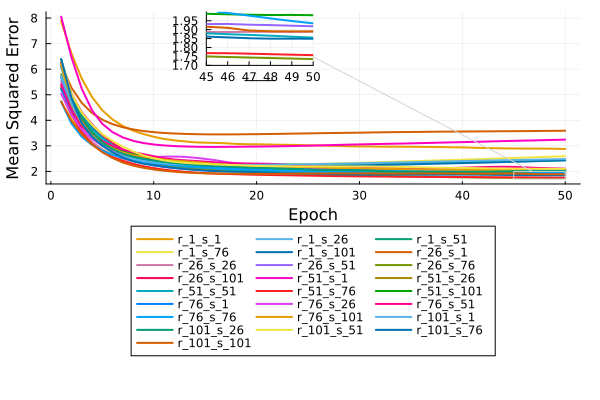

In [42]:
plot(Matrix(df_to_plot), labels=permutedims(string.(names(df_to_plot))), linewidth=2, botton_margin=0, right_margin = 3Plots.mm)
# plot(range(1,50, length = 50), all_mse[2],label = "ϵ = 0.002")
theme(:wong)


lens!([45, 50], [1.7, 2], inset = (1, bbox(0.3, 0.0, 0.2, 0.2)), subplot=2)


xlabel!("Epoch", subplot =1)
ylabel!("Mean Squared Error", subplot =1 )

plot!(legend=:outerbottom, legendcolumns=3)

# savefig("errors.pdf")

In [48]:
df_loaded[50, "r_1_s_76"]

2.597166401358842

In [52]:
i = 1
j = 1
matrix_end = zeros(5,5)
for nr in num_reads
    for ns in num_sweeps
        matrix_end[i,j] = df_loaded[50, "r_$(nr)_s_$(ns)"]
        j += 1
    end
    j = 1
    i += 1
end
matrix_end

5×5 Matrix{Float64}:
 2.87845  2.07953  2.43684  2.59717  2.43417
 3.59174  1.88866  1.91892  1.73535  2.02491
 3.2437   2.01487  1.85546  1.7572   1.98099
 2.07195  2.07304  2.10746  1.93542  2.04516
 2.48446  2.0345   2.09966  1.84906  1.89051

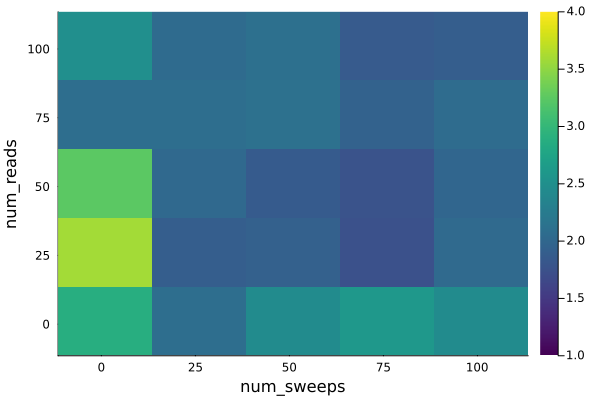

In [61]:
heatmap((1:25:101), (1:25:101), matrix_end, clims=(1, 4))
xlabel!("num_sweeps")
ylabel!("num_reads")